<a href="https://colab.research.google.com/github/AlbertPangilinan/SEP740/blob/main/report2/preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


SEP 740 Final Project - Aerial Perspective Object Detection

Authors: 
   Jukai Hu (400485702)
   Ray Albert Pangilinan (400065058)
   Luke Vanden Broek (400486889)

ML Algorithms (Random Forest, K-nearest Neighbours, Naive Bayes)

Imports

In [5]:
import os.path
cwd = os.getcwd()
cwd="/content/drive/MyDrive/SEP 740/Code_and_Dataset/dataset"


import matplotlib. pyplot as plt
import numpy as np
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from skimage import io
import tensorflow as tf




Reading raw image and class label files from disk


In [6]:

images_dir = cwd + "/dataset/semantic_drone_dataset/original_images/"
labels_dir = cwd + "/dataset/semantic_drone_dataset/label_images_semantic/"

images_paths = os.listdir(images_dir)
images_paths.sort()
image_0_filename = images_paths[0]

labels_paths = os.listdir(labels_dir)
labels_paths.sort()
label_0_filename = labels_paths[0]

images_paths = list(map(lambda img : images_dir + img, images_paths))
labels_paths = list(map(lambda img : labels_dir + img, labels_paths))

images_paths.sort()
labels_paths.sort()

images = list(map(lambda img : Image.open(img), images_paths))
labels = list(map(lambda img : Image.open(img), labels_paths))

Attempting to load images as arrays, or trying to find some way to apply pre-processing (not going well so far)

In [13]:
#img=np.zeros((400,4000,6000,3))
#for i in range(len(images)):
#  img[i,:,:,:] = tf.keras.preprocessing.image.img_to_array(images)
#img.shape

from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen=tf.keras.preprocessing.image_dataset_from_directory(
    images_dir,
    labels = None
)



#datagen=ImageDataGenerator()

#generator = datagen.flow_from_directory(
#    images_dir,
#    batch_size=32)


Found 400 files belonging to 1 classes.


tensorflow.python.data.ops.dataset_ops.BatchDataset

In [ ]:
images = list(map(lambda img : io.imread(img), images_paths))
images[0].size[0]


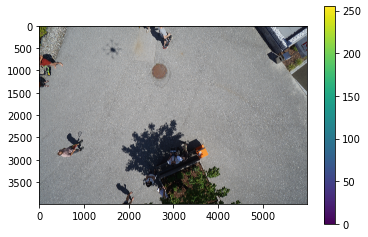

In [ ]:
len(images)
#Show example image
plt.figure()
plt.imshow(images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
print(range(len(images)))
plt.figure()
plt.imshow(images[0][:,:,0])
plt.colorbar()
plt.grid(False)
plt.show()

range(0, 400)


TypeError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
import cv2
b=4 #choose number for downsampling 
print(pow(2,b))
ar=np.zeros((len(images),int(images[0].size[1]/(pow(2,b))),int(images[0].size[0]/(pow(2,b))),3))
print(ar.shape)
print(images[0].size)
print(np.array(images[0]).shape)
for i in range(len(images)):
  im=np.array(images[i])
  for j in range(b):
    im=cv2.pyrDown(im)
  ar[i,:,:,:] = im
  del im


16
(400, 250, 375, 3)
(6000, 4000)
(4000, 6000, 3)


In [ ]:
import cv2
image1=np.array(images[399])
image2 = cv2.pyrDown(image1)
print(image1.shape)
print(image2.shape)
print(cv2.pyrDown(image2).shape)

(4000, 6000, 3)
(2000, 3000, 3)
(1000, 1500, 3)


In [ ]:
#Show example image
plt.figure()
plt.imshow(image1)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Show example image
plt.figure()
plt.imshow(image2)
plt.colorbar()
plt.grid(False)
plt.show()